# 🎯 Feature Engineering — Part A: Individual Concepts (Colab-Ready)

**Updated:** 2025-08-22

This notebook is designed for **first-time learners**. You will practice each feature engineering step **individually** (no pipelines yet), so you can clearly see *what each step does* and *why it matters*.

**What you'll practice:**
- Dataset loading & quick audit
- Handling missing values (drop, impute)
- Scaling & normalization (standardization, min-max, per-row normalization)
- Encoding categorical variables (ordinal vs one-hot)
- Feature transformations (log, power, polynomial)
- Simple dimensionality reduction (PCA) for visualization
- Short exercises after each section

> Use this Part A first. After you are comfortable, move to **Part B (Pipelines)** to automate and combine steps.

## 0) Setup

In [ ]:
# If running in Google Colab, you can install optional packages here:
# !pip install -q statsmodels==0.14.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 100)

## 1) Dataset Setup & Quick Audit

In [ ]:
# Option A: Load Titanic from a stable GitHub mirror (recommended for first run)
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
print("Shape:", df.shape)
df.head()

In [ ]:
# Option B: Upload your own CSV (uncomment to use in Colab)
# from google.colab import files
# up = files.upload()  # pick file
# import io
# df = pd.read_csv(io.BytesIO(up[list(up.keys())[0]]))
# print("Shape:", df.shape)
# df.head()

In [ ]:
# Quick audit
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nNumeric describe:")
df.describe().T

## 2) Handling Missing Values (Individually)

**Goal:** Learn when to **drop** vs **impute**.

**Common choices**
- Numeric: mean/median
- Categorical: most frequent

We'll practice on Titanic columns like `Age`, `Embarked`, and `Cabin`.

In [ ]:
# View null counts
df.isna().sum().sort_values(ascending=False).head(10)

In [ ]:
# 2.1 DROP example (use cautiously)
df_drop_rows = df.dropna(subset=['Age', 'Embarked'])  # drop rows where these are null
print("Original:", df.shape, "After drop:", df_drop_rows.shape)

In [ ]:
# 2.2 SIMPLE IMPUTE example
df_imp = df.copy()
# Numeric (Age): median
df_imp['Age'] = df_imp['Age'].fillna(df_imp['Age'].median())
# Categorical (Embarked): most frequent
df_imp['Embarked'] = df_imp['Embarked'].fillna(df_imp['Embarked'].mode()[0])

# 'Cabin' is very sparse; we can fill with "Unknown"
df_imp['Cabin'] = df_imp['Cabin'].fillna('Unknown')

df_imp.isna().sum().head(10)

In [ ]:
# 2.3 KNN Imputation (numeric only demonstration)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
knn_df = df[num_cols].copy()
imputer = KNNImputer(n_neighbors=3)
knn_imputed = imputer.fit_transform(knn_df)
knn_imputed_df = pd.DataFrame(knn_imputed, columns=num_cols)
knn_imputed_df.head()

**📝 Exercise 2**
1) Compare **mean vs median** imputation for `Age`. Which preserves the original distribution better?  
2) For `Embarked`, try filling with a new category (`'Unknown'`) vs mode. What changes in `value_counts()`?

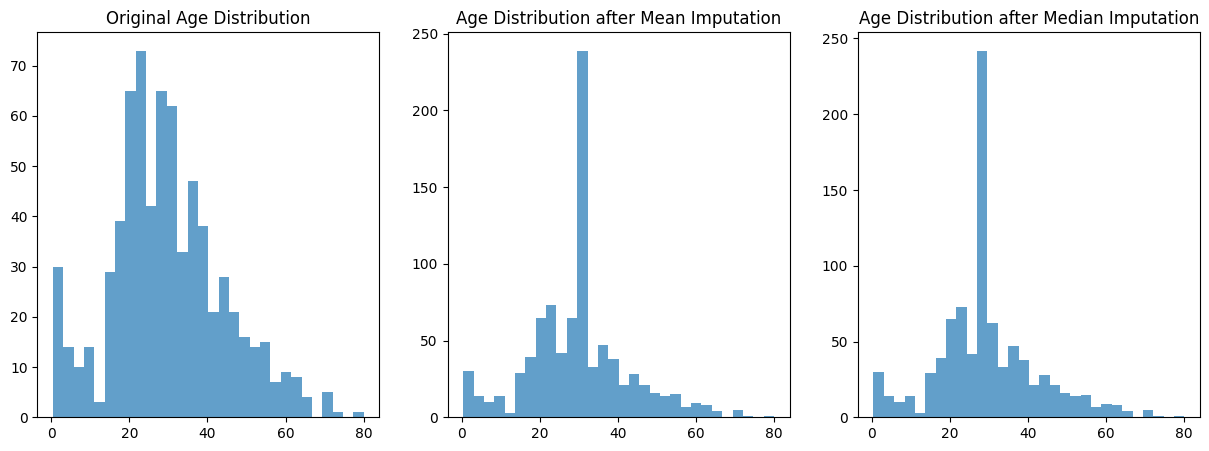

Original Age Mean: 29.69911764705882
Age Mean after Mean Imputation: 29.69911764705882
Age Mean after Median Imputation: 29.36158249158249

Original Age Median: 28.0
Age Median after Median Imputation: 28.0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 2, Part 1: Compare mean vs median imputation for Age
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)

df_age_mean = df.copy()
df_age_median = df.copy()

# Impute with mean
mean_age = df_age_mean['Age'].mean()
df_age_mean['Age_mean_imputed'] = df_age_mean['Age'].fillna(mean_age)

# Impute with median
median_age = df_age_median['Age'].median()
df_age_median['Age_median_imputed'] = df_age_median['Age'].fillna(median_age)

# Compare distributions visually
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(df['Age'].dropna(), bins=30, alpha=0.7)
axes[0].set_title('Original Age Distribution')
axes[1].hist(df_age_mean['Age_mean_imputed'], bins=30, alpha=0.7)
axes[1].set_title('Age Distribution after Mean Imputation')
axes[2].hist(df_age_median['Age_median_imputed'], bins=30, alpha=0.7)
axes[2].set_title('Age Distribution after Median Imputation')
plt.show()

# Compare mean and median values after imputation
print("Original Age Mean:", df['Age'].mean())
print("Age Mean after Mean Imputation:", df_age_mean['Age_mean_imputed'].mean())
print("Age Mean after Median Imputation:", df_age_median['Age_median_imputed'].mean())
print("\nOriginal Age Median:", df['Age'].median())
print("Age Median after Median Imputation:", df_age_median['Age_median_imputed'].median())

In [6]:
import pandas as pd

# Exercise 2, Part 2: Compare filling Embarked with 'Unknown' vs mode
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)

df_embarked_unknown = df.copy()
df_embarked_mode = df.copy()

# Fill with 'Unknown'
df_embarked_unknown['Embarked_filled'] = df_embarked_unknown['Embarked'].fillna('Unknown')

# Fill with mode
mode_embarked = df_embarked_mode['Embarked'].mode()[0]
df_embarked_mode['Embarked_filled'] = df_embarked_mode['Embarked'].fillna(mode_embarked)

# Compare value counts
print("Original Embarked Value Counts:\n", df['Embarked'].value_counts(dropna=False))
print("\nEmbarked Value Counts after Filling with 'Unknown':\n", df_embarked_unknown['Embarked_filled'].value_counts(dropna=False))
print("\nEmbarked Value Counts after Filling with Mode:\n", df_embarked_mode['Embarked_filled'].value_counts(dropna=False))

Original Embarked Value Counts:
 Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Embarked Value Counts after Filling with 'Unknown':
 Embarked_filled
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64

Embarked Value Counts after Filling with Mode:
 Embarked_filled
S    646
C    168
Q     77
Name: count, dtype: int64


## 3) Scaling & Normalization (Individually)

- **Standardization**: z = (x - mean)/std (good for many ML models)
- **MinMax scaling**: maps to [0,1] (useful when features have different units)
- **Per-row Normalization**: scales each *row vector* to unit norm (useful for text-like frequency vectors)

We'll demonstrate on `Fare` and `Age`.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(df_imp['Age'].dropna(), bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(df_imp['Fare'].dropna(), bins=30)
axes[1].set_title('Fare - Raw')
plt.show()

In [ ]:
sc_std = StandardScaler()
sc_mm  = MinMaxScaler()

age_std = sc_std.fit_transform(df_imp[['Age']])
fare_mm = sc_mm.fit_transform(df_imp[['Fare']])

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(age_std.flatten(), bins=30)
axes[0].set_title('Age - Standardized')
axes[1].hist(fare_mm.flatten(), bins=30)
axes[1].set_title('Fare - MinMax [0,1]')
plt.show()

**📝 Exercise 3**
1) Standardize `Fare` and plot the histogram.  
2) Apply **Normalizer** on `[Age, Fare]` rows and check the first 5 normalized vectors.

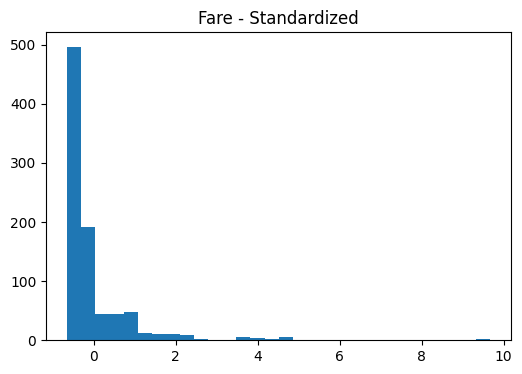

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Exercise 3, Part 1: Standardize Fare and plot the histogram
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
df_imp = df.copy() # Assuming df_imp from section 2 is the starting point

# Impute Fare with median to handle potential NaNs before scaling
df_imp['Fare'] = df_imp['Fare'].fillna(df_imp['Fare'].median())

sc_std = StandardScaler()
fare_std = sc_std.fit_transform(df_imp[['Fare']])

plt.figure(figsize=(6, 4))
plt.hist(fare_std.flatten(), bins=30)
plt.title('Fare - Standardized')
plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import Normalizer

# Exercise 3, Part 2: Apply Normalizer on [Age, Fare] rows and check the first 5 normalized vectors.
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
df_imp = df.copy() # Assuming df_imp from section 2 is the starting point

# Impute Age and Fare with median to handle potential NaNs before normalization
df_imp['Age'] = df_imp['Age'].fillna(df_imp['Age'].median())
df_imp['Fare'] = df_imp['Fare'].fillna(df_imp['Fare'].median())


norm = Normalizer()
age_fare = df_imp[['Age', 'Fare']]
age_fare_normalized = norm.fit_transform(age_fare)

print("First 5 normalized [Age, Fare] vectors:")
print(age_fare_normalized[:5])

First 5 normalized [Age, Fare] vectors:
[[0.94975704 0.31298812]
 [0.47041706 0.88244422]
 [0.95655127 0.29156418]
 [0.55033828 0.83494178]
 [0.97455519 0.22414769]]


## 4) Encoding Categorical Variables (Individually)

- **Ordinal/Label encoding**: map categories to integers (assumes order or used with tree models).  
- **One-Hot encoding**: binary column per category (no order assumption).

We'll use `Sex` and `Embarked` as examples.

In [ ]:
# 4.1 Ordinal encoding demo (note: no real order in Sex/Embarked; this is just to illustrate)
enc = OrdinalEncoder()
ord_demo = df_imp[['Sex','Embarked']].copy()
ord_vals = enc.fit_transform(ord_demo)
pd.DataFrame(ord_vals, columns=['Sex_ord','Embarked_ord']).head()

In [ ]:
# 4.2 One-Hot encoding demo with pandas
ohe_embarked = pd.get_dummies(df_imp['Embarked'], prefix='Embarked')
ohe_sex = pd.get_dummies(df_imp['Sex'], prefix='Sex')
encoded_df = pd.concat([df_imp[['Survived','Age','Fare']], ohe_sex, ohe_embarked], axis=1)
encoded_df.head()

**📝 Exercise 4**
1) Compare the **number of features** produced by ordinal vs one-hot for `Embarked`.  
2) Why might one-hot be safer for linear models?

In [13]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Exercise 4, Part 1: Compare the number of features produced by ordinal vs one-hot for Embarked.
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
df_imp = df.copy() # Assuming df_imp from section 2 is the starting point

# Impute Embarked with mode to handle potential NaNs
df_imp['Embarked'] = df_imp['Embarked'].fillna(df_imp['Embarked'].mode()[0])

# Ordinal Encoding
ord_enc = OrdinalEncoder()
embarked_ord = ord_enc.fit_transform(df_imp[['Embarked']])
num_features_ordinal = embarked_ord.shape[1]

# One-Hot Encoding
embarked_ohe = pd.get_dummies(df_imp['Embarked'], prefix='Embarked')
num_features_onehot = embarked_ohe.shape[1]

print(f"Number of features after Ordinal Encoding (Embarked): {num_features_ordinal}")
print(f"Number of features after One-Hot Encoding (Embarked): {num_features_onehot}")

Number of features after Ordinal Encoding (Embarked): 1
Number of features after One-Hot Encoding (Embarked): 3


In [14]:
# Exercise 4, Part 2: Why might one-hot be safer for linear models?

print("One-hot encoding is generally safer for linear models because it prevents the model from assuming an ordinal relationship between categories that doesn't exist. Linear models interpret numerical values as having a magnitude and order. If you use ordinal encoding on a categorical variable where there's no inherent order (like 'Embarked' - S, C, Q), the model might incorrectly assign higher importance or weight to categories with higher numerical labels. One-hot encoding creates separate binary features for each category, treating each category as an independent entity without implying any order or magnitude relationship between them.")

One-hot encoding is generally safer for linear models because it prevents the model from assuming an ordinal relationship between categories that doesn't exist. Linear models interpret numerical values as having a magnitude and order. If you use ordinal encoding on a categorical variable where there's no inherent order (like 'Embarked' - S, C, Q), the model might incorrectly assign higher importance or weight to categories with higher numerical labels. One-hot encoding creates separate binary features for each category, treating each category as an independent entity without implying any order or magnitude relationship between them.


## 5) Feature Transformation (Individually)

- **Log transform**: t = log1p(x) for right-skewed positive data (e.g., Fare).
- **Power transform**: Yeo-Johnson can handle zero/negative values; stabilizes variance.
- **Polynomial features**: create interactions/quadratics for simple non-linear modeling.

We'll use `Fare` and `Age`.

In [ ]:
# 5.1 Log transform on Fare (positive values)
fare_raw = df_imp['Fare'].dropna().values.reshape(-1,1)
fare_log = np.log1p(fare_raw)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(fare_raw.flatten(), bins=30)
axes[0].set_title('Fare - Raw')
axes[1].hist(fare_log.flatten(), bins=30)
axes[1].set_title('Fare - log1p')
plt.show()

In [ ]:
# 5.2 Power transform (Yeo-Johnson) on [Age, Fare]
pt = PowerTransformer(method='yeo-johnson')
af = df_imp[['Age','Fare']].dropna()
af_pt = pt.fit_transform(af)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(af['Age'].values, bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(af_pt[:,0], bins=30)
axes[1].set_title('Age - Yeo-Johnson')
plt.show()

In [ ]:
# 5.3 Polynomial features on [Age, Fare] (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
af_poly = poly.fit_transform(af[['Age','Fare']])
print("Original shape:", af[['Age','Fare']].shape, " -> With poly:", af_poly.shape)
poly.get_feature_names_out(['Age','Fare'])[:6]

**📝 Exercise 5**
1) Identify one numeric column that is **skewed**. Try both **log** and **power** transforms and compare histograms.  
2) With `PolynomialFeatures(2)`, which new terms are created from `Age` and `Fare`?

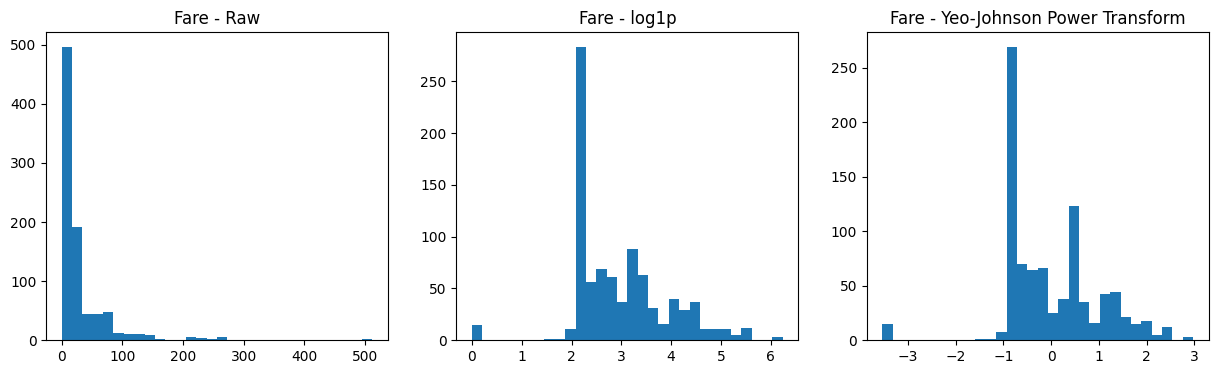

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Exercise 5, Part 1: Identify one skewed numeric column, apply log and power transforms, and compare histograms.
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
df_imp = df.copy() # Assuming df_imp from section 2 is the starting point

# Impute Fare with median to handle potential NaNs before transformation
df_imp['Fare'] = df_imp['Fare'].fillna(df_imp['Fare'].median())

# 'Fare' is a skewed numeric column (as seen in previous plots)
fare_raw = df_imp['Fare'].values.reshape(-1, 1)

# Log transform (using log1p to handle potential zero values)
fare_log = np.log1p(fare_raw)

# Power transform (Yeo-Johnson handles zero/negative, but Fare is non-negative after imputation)
pt = PowerTransformer(method='yeo-johnson')
fare_pt = pt.fit_transform(fare_raw)

# Compare histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(fare_raw.flatten(), bins=30)
axes[0].set_title('Fare - Raw')
axes[1].hist(fare_log.flatten(), bins=30)
axes[1].set_title('Fare - log1p')
axes[2].hist(fare_pt.flatten(), bins=30)
axes[2].set_title('Fare - Yeo-Johnson Power Transform')
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Exercise 5, Part 2: With PolynomialFeatures(2), which new terms are created from Age and Fare?
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
df_imp = df.copy() # Assuming df_imp from section 2 is the starting point

# Impute Age and Fare with median to handle potential NaNs before creating polynomial features
df_imp['Age'] = df_imp['Age'].fillna(df_imp['Age'].median())
df_imp['Fare'] = df_imp['Fare'].fillna(df_imp['Fare'].median())

af = df_imp[['Age','Fare']]

poly = PolynomialFeatures(degree=2, include_bias=False)
af_poly = poly.fit_transform(af)

print("Original features:", af.columns.tolist())
print("New features created by PolynomialFeatures(degree=2):")
print(poly.get_feature_names_out(af.columns))

Original features: ['Age', 'Fare']
New features created by PolynomialFeatures(degree=2):
['Age' 'Fare' 'Age^2' 'Age Fare' 'Fare^2']


## 6) Simple Dimensionality Reduction (PCA) — Visualization Only

We will apply PCA to **numeric** features to reduce to 2D and make a scatter plot colored by `Survived` (if present).

> Note: This is for **intuition/visualization** only in Part A.

In [ ]:
# Prepare a numeric-only frame (drop NA for simplicity here)
num_only = df_imp.select_dtypes(include=['number']).dropna()
y = df_imp.loc[num_only.index, 'Survived'] if 'Survived' in df_imp.columns else None

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(num_only.values)

print("Explained variance ratios:", pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(6,5))
if y is not None:
    # Color by Survived (0/1). Using a simple split to avoid specifying colors.
    idx0 = (y.values == 0)
    idx1 = (y.values == 1)
    plt.scatter(Z[idx0,0], Z[idx0,1], s=10, label='Survived=0')
    plt.scatter(Z[idx1,0], Z[idx1,1], s=10, label='Survived=1')
    plt.legend()
else:
    plt.scatter(Z[:,0], Z[:,1], s=10)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (numeric only)')
plt.show()

**📝 Exercise 6**
1) Which **two numeric columns** contribute the most variance before PCA (use `df.var()`)?  
2) Try PCA with `n_components=3` and print the cumulative explained variance.

In [17]:
import pandas as pd

# Exercise 6, Part 1: Which two numeric columns contribute the most variance before PCA?
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)

# Select only numeric columns and drop non-numeric ones for variance calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate variance for each numeric column
variance_per_column = numeric_df.var().sort_values(ascending=False)

print("Variance per numeric column (sorted descending):\n", variance_per_column)
print("\nTop 2 numeric columns with most variance:")
print(variance_per_column.head(2))

Variance per numeric column (sorted descending):
 PassengerId    66231.000000
Fare            2469.436846
Age              211.019125
SibSp              1.216043
Pclass             0.699015
Parch              0.649728
Survived           0.236772
dtype: float64

Top 2 numeric columns with most variance:
PassengerId    66231.000000
Fare            2469.436846
dtype: float64


In [18]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Exercise 6, Part 2: Try PCA with n_components=3 and print the cumulative explained variance.
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
df_imp = df.copy() # Assuming df_imp from section 2 is the starting point

# Impute numeric columns with median to handle potential NaNs before PCA
numeric_cols = df_imp.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df_imp[col] = df_imp[col].fillna(df_imp[col].median())

# Select numeric columns for PCA
num_only = df_imp.select_dtypes(include=['number'])


pca = PCA(n_components=3, random_state=42)
pca.fit(num_only)

explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

print("Explained variance ratios per component:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio with 3 components:", explained_variance_ratio_cumulative[-1])

Explained variance ratios per component: [0.96165195 0.03587775 0.0024362 ]
Cumulative explained variance ratio with 3 components: 0.9999659003439996


## 7) Consolidated Practice (No Pipelines Yet)

Using the operations you've learned, perform a **clean preprocessing** (manually):
1) Impute: `Age` (median), `Embarked` (mode), `Cabin` ('Unknown').  
2) Scale: standardize `Age` and min-max scale `Fare`.  
3) Encode: one-hot `Sex` and `Embarked`.  
4) Transform: log1p `Fare`.  
5) (Optional) PCA on numeric subset for 2D visualization.

Then, answer:
- Which step **changed the data distribution** the most?
- Which encoding produced **more features**, ordinal or one-hot? Why?
- If you trained a simple logistic regression on your manually processed features, what **accuracy** do you get on a 75/25 split? (Optional challenge)

## ✅ What You Should Take Away from Part A

- Each step (imputation, scaling, encoding, transforms) has a **clear purpose** and **visible effect**.  
- You can now apply them **manually** and reason about their impact.  
- Next: move to **Part B (Pipelines)** to **combine & automate** these steps safely (avoid leakage, enable cross-validation, and reproducibility).